In this notebook I hinder the Gaussian Mixture algorithm with different data sets were the the generated data will be classified
in many classes.The main goal of this is to have a higher number of classes and data sets that can be easy cliassified
just by looking at the data but of course not well classified from the Gaussian Mixture algorithm. 

1)Below we create a line of sets that are normally distributed with mean 0.5 and variance 0.5.I choose this numbers also
created gaps between them in order to make it easy for someone to find the 8 classes just by seeing the data set (the all red one).
Increasing the variance of course would make the set almost unable to be classified. I also added one set that is generated
from a logarithm with noise (could also be just a line) in order to hider the Gaussian Mixture algorithm.

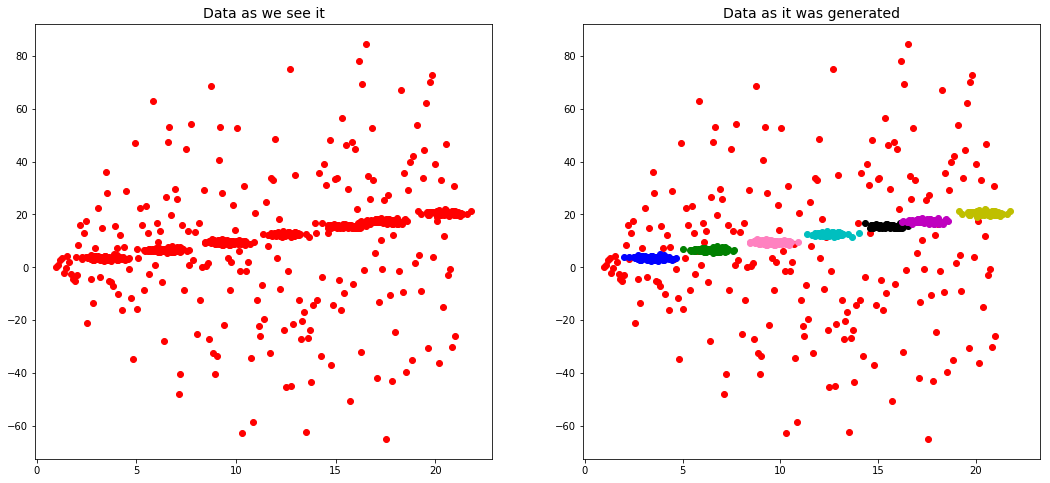

In [157]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
MAXN1=90
MAXN=220
x = np.linspace(1,21,MAXN)
yp = 6*np.log(x)*np.random.normal(0.5,2,size=(MAXN))
X = np.array([x,yp])
X = np.concatenate([X.T,[3,3]+np.random.normal(0.5,0.5,size=(MAXN1,2))]) 
X = np.concatenate([X,[6,6]+np.random.normal(0.5,0.5,size=(MAXN1,2))])
X = np.concatenate([X,[9,9]+np.random.normal(0.5,0.5,size=(MAXN1,2))])
X = np.concatenate([X,[12,12]+np.random.normal(0.5,0.5,size=(MAXN1,2))])
X = np.concatenate([X,[15,15]+np.random.normal(0.5,0.5,size=(MAXN1,2))])
X = np.concatenate([X,[17,17]+np.random.normal(0.5,0.5,size=(MAXN1,2))])
X = np.concatenate([X,[20,20]+np.random.normal(0.5,0.5,size=(MAXN1,2))])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN1,1))])
y = np.concatenate([y,3*np.ones((MAXN1,1))])
y = np.concatenate([y,4*np.ones((MAXN1,1))])
y = np.concatenate([y,5*np.ones((MAXN1,1))])
y = np.concatenate([y,6*np.ones((MAXN1,1))])
y = np.concatenate([y,7*np.ones((MAXN1,1))])
y = np.concatenate([y,8*np.ones((MAXN1,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color = 'g')
plt.scatter(X[(y==4).ravel(),0],X[(y==4).ravel(),1],color = 'xkcd:pink')
plt.scatter(X[(y==5).ravel(),0],X[(y==5).ravel(),1],color = 'c')
plt.scatter(X[(y==6).ravel(),0],X[(y==6).ravel(),1],color = 'k')
plt.scatter(X[(y==7).ravel(),0],X[(y==7).ravel(),1],color = 'm')
plt.scatter(X[(y==8).ravel(),0],X[(y==8).ravel(),1],color = 'y')


plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((18,8))


[[-1.94515098  0.28701316]
 [ 0.04245907 -1.931437  ]
 [-0.36838871  0.74688891]
 [-0.15104896 -0.69739481]
 [-1.70219007  2.87583318]
 [ 0.68148414  1.38969381]
 [ 1.55034305  2.79937814]
 [ 2.62565764 -0.8509622 ]]


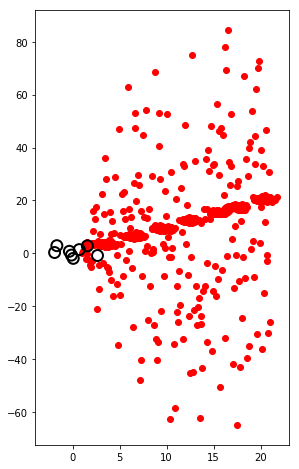

In [158]:
K=8
np.mean(np.random.lognormal(10,1,size=(MAXN1,2)))
idx=np.random.randint(0,X.shape[0],K)
C=5*np.random.rand(K,X.shape[1])-2
Sigma=100.*np.ones((K,X.shape[1]))
Pi=(1./K)*np.ones((K,1))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10,color='k')
fig = plt.gcf()
fig.set_size_inches((10,8))
print (C)

[[  1.53732661e+00   1.48527645e+00]
 [  9.30440606e+00   1.45397710e+02]
 [  1.30159695e+00   1.28637561e+00]
 [  1.28326739e+00   1.67769910e+01]
 [  1.80768894e+00   2.18312917e+01]
 [  6.47866382e-01   5.88351513e-01]
 [  1.33140707e-01   1.43307736e-01]
 [  8.23778568e+00   1.61939022e+02]] [[ 0.23737235]
 [ 0.07017891]
 [ 0.22240257]
 [ 0.028328  ]
 [ 0.02850565]
 [ 0.21510992]
 [ 0.10587006]
 [ 0.09223253]]


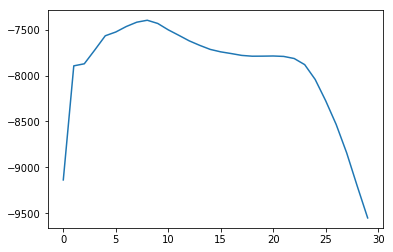

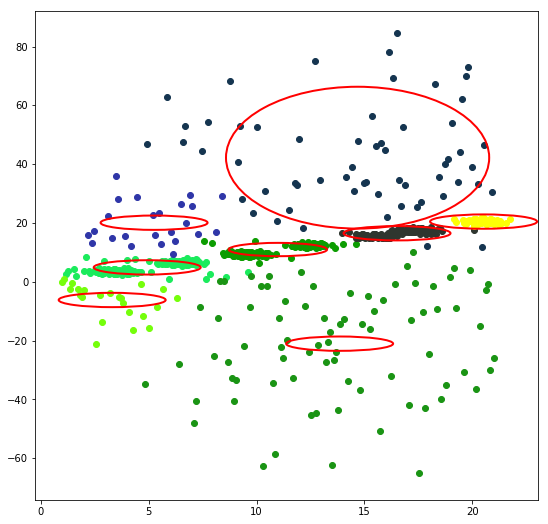

In [159]:
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist

def define_responsibilities(X,C,Sigma,Pi):
    r = np.zeros((X.shape[0],C.shape[0]))
    for i in range(C.shape[0]):
        d = cdist(C[i,:][np.newaxis,:],X,metric='seuclidean',V=Sigma[i,:])**2
        r[:,i]=Pi[i]*np.exp(-0.5*d)/np.prod(np.sqrt(2*np.pi)*Sigma[i,:])
    r = r/np.tile(np.sum(r,axis=1)[:,np.newaxis],(1,C.shape[0]))
    return r

def soft_kmeans2_iter(X,C,Sigma,Pi):
    I=X.shape[1]
    r = define_responsibilities(X,C,Sigma,Pi)
    for k in range(C.shape[0]):
        C[k,:]=np.sum((np.tile(r[:,k][:,np.newaxis],(1,C.shape[1]))*X),axis=0)/np.sum(r[:,k])
        Sigma[k,:]= np.sum(np.tile(r[:,k][:,np.newaxis],(1,C.shape[1]))*(X-np.tile(C[k,:][np.newaxis,:],(X.shape[0],1)))**2,axis=0)/(I*np.sum(r[:,k]))
        Pi[k]=np.sum(r[:,k])/np.sum(r) 
    return C,Sigma,Pi

def evaluate_objective(X,C,Sigma,Pi):
    J=0
    for k in range(C.shape[1]):
        J += Pi[k]*multivariate_normal.pdf(X, mean=C[k,:], cov=Sigma[k,:])
    return np.sum(np.log(J))
    
conv=[]
for iter in range(30):
    conv.append(evaluate_objective(X,C,Sigma,Pi))
    C,Sigma,Pi = soft_kmeans2_iter(X,C,Sigma,Pi)
print (Sigma,Pi)

plt.figure()
plt.plot(conv)
plt.figure()
r = define_responsibilities(X,C,Sigma,Pi)
y_pred = np.argmax(r,axis=1)
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)

from matplotlib.patches import Ellipse
ax = plt.gca()
ellipse = Ellipse(xy=C[0,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[1,:], width=4*np.sqrt(Sigma[1,0]), height=4*np.sqrt(Sigma[1,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[2,:], width=4*np.sqrt(Sigma[2 ,0]), height=4*np.sqrt(Sigma[2,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[3,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[4,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[5,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[6,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[7,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

fig = plt.gcf()
fig.set_size_inches((9,9))

As we can see the classification is bad. This algorithm makes bad classification when there is a lot of scattered data. However, in this case we can see that except form the scattered data the rest is very concentrated (in different areas). So, one way to face this problem is to do the classifications without the scatters poinds  with Gaussian Mixture algorithm  which is easy to be clasiffied form the algorithm and just let the scattered point be a class alone.This can be done in this data set if we actually assume that the scatterd data is over the line $y=x+1$ and under the line $y=x-1$ in order to limit the classification between this lines.

2)Below I try a linear data set. 

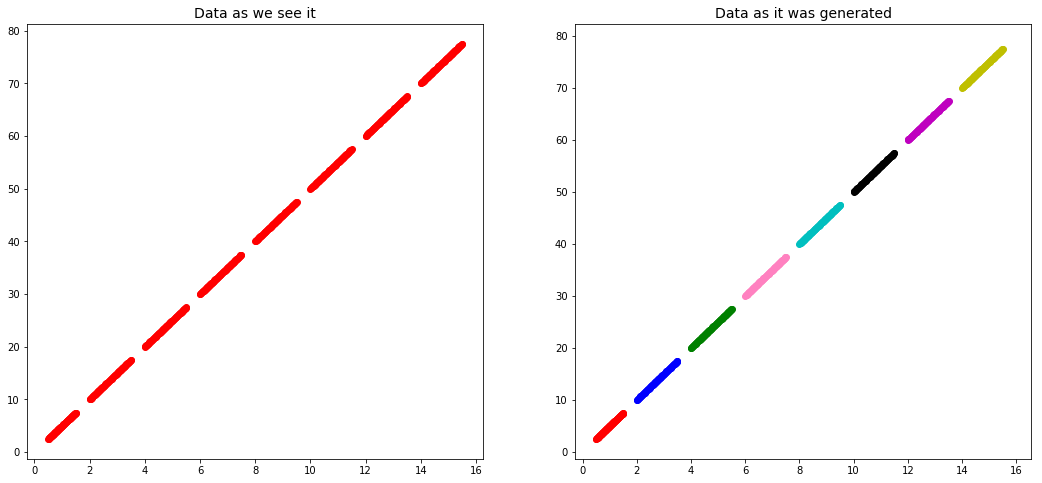

In [165]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
MAXN1=90
MAXN=100
x = np.linspace(0.5,1.5,MAXN1)
yp = 0.5*x
X = np.array([x,5*x])
x = np.linspace(2,3.5,MAXN1)
X = np.concatenate([X.T,np.array([x,5*x]).T]) 
x = np.linspace(4,5.5,MAXN1)
X = np.concatenate([X,np.array([x,5*x]).T])
x = np.linspace(6,7.5,MAXN1)
X = np.concatenate([X,np.array([x,5*x]).T])
x = np.linspace(8,9.5,MAXN1)
X = np.concatenate([X,np.array([x,5*x]).T])
x = np.linspace(10,11.5,MAXN1)
X = np.concatenate([X,np.array([x,5*x]).T])
x = np.linspace(12,13.5,MAXN1)
X = np.concatenate([X,np.array([x,5*x]).T])
x = np.linspace(14,15.5,MAXN1)
X = np.concatenate([X,np.array([x,5*x]).T])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN1,1)),2*np.ones((MAXN1,1))])
y = np.concatenate([y,3*np.ones((MAXN1,1))])
y = np.concatenate([y,4*np.ones((MAXN1,1))])
y = np.concatenate([y,5*np.ones((MAXN1,1))])
y = np.concatenate([y,6*np.ones((MAXN1,1))])
y = np.concatenate([y,7*np.ones((MAXN1,1))])
y = np.concatenate([y,8*np.ones((MAXN1,1))])


plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color = 'g')
plt.scatter(X[(y==4).ravel(),0],X[(y==4).ravel(),1],color = 'xkcd:pink')
plt.scatter(X[(y==5).ravel(),0],X[(y==5).ravel(),1],color = 'c')
plt.scatter(X[(y==6).ravel(),0],X[(y==6).ravel(),1],color = 'k')
plt.scatter(X[(y==7).ravel(),0],X[(y==7).ravel(),1],color = 'm')
plt.scatter(X[(y==8).ravel(),0],X[(y==8).ravel(),1],color = 'y')


plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((18,8))


[[ 2.10855652 -0.28974632]
 [ 0.7405242  -0.99854829]
 [ 0.29247153 -0.66304963]
 [ 0.38755036 -0.83656151]
 [ 1.06869525 -1.80987284]
 [-1.28134171 -0.16665563]
 [ 0.11757482  0.73014378]
 [-0.23274747  1.37254375]]


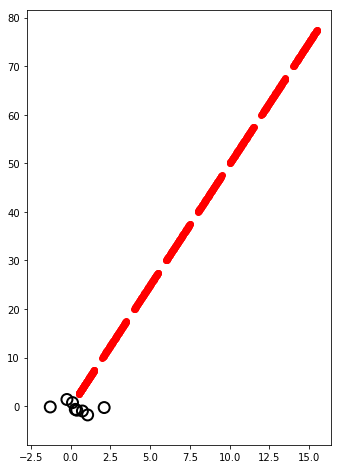

In [166]:
K=8
np.mean(np.random.lognormal(10,1,size=(MAXN1,2)))
idx=np.random.randint(0,X.shape[0],K)
C=5*np.random.rand(K,X.shape[1])-2
Sigma=100.*np.ones((K,X.shape[1]))
Pi=(1./K)*np.ones((K,1))
print (C)
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10,color='k')
fig = plt.gcf()
fig.set_size_inches((12,8))

[[  0.09585713   2.39642831]
 [  0.02427693   0.60692334]
 [  0.02282748   0.57068695]
 [  0.02406406   0.60160156]
 [  0.45204584  11.3011461 ]
 [  0.02555096   0.63877388]
 [  0.09584121   2.39603033]
 [  0.59598758  14.89968962]] [[ 0.12500001]
 [ 0.06263848]
 [ 0.06072464]
 [ 0.06236105]
 [ 0.25000047]
 [ 0.06427535]
 [ 0.12498433]
 [ 0.25001567]]


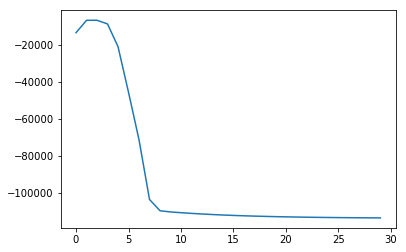

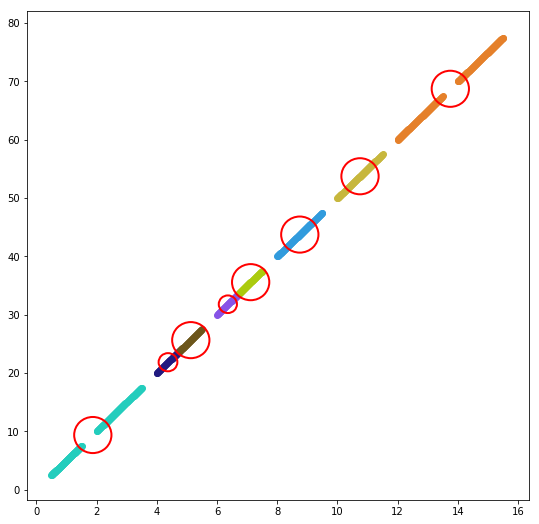

In [167]:
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist

def define_responsibilities(X,C,Sigma,Pi):
    r = np.zeros((X.shape[0],C.shape[0]))
    for i in range(C.shape[0]):
        d = cdist(C[i,:][np.newaxis,:],X,metric='seuclidean',V=Sigma[i,:])**2
        r[:,i]=Pi[i]*np.exp(-0.5*d)/np.prod(np.sqrt(2*np.pi)*Sigma[i,:])
    r = r/np.tile(np.sum(r,axis=1)[:,np.newaxis],(1,C.shape[0]))
    return r

def soft_kmeans2_iter(X,C,Sigma,Pi):
    I=X.shape[1]
    r = define_responsibilities(X,C,Sigma,Pi)
    for k in range(C.shape[0]):
        C[k,:]=np.sum((np.tile(r[:,k][:,np.newaxis],(1,C.shape[1]))*X),axis=0)/np.sum(r[:,k])
        Sigma[k,:]= np.sum(np.tile(r[:,k][:,np.newaxis],(1,C.shape[1]))*(X-np.tile(C[k,:][np.newaxis,:],(X.shape[0],1)))**2,axis=0)/(I*np.sum(r[:,k]))
        Pi[k]=np.sum(r[:,k])/np.sum(r) 
    return C,Sigma,Pi

def evaluate_objective(X,C,Sigma,Pi):
    J=0
    for k in range(C.shape[1]):
        J += Pi[k]*multivariate_normal.pdf(X, mean=C[k,:], cov=Sigma[k,:])
    return np.sum(np.log(J))
    
conv=[]
for iter in range(30):
    conv.append(evaluate_objective(X,C,Sigma,Pi))
    C,Sigma,Pi = soft_kmeans2_iter(X,C,Sigma,Pi)
print (Sigma,Pi)

plt.figure()
plt.plot(conv)
plt.figure()
r = define_responsibilities(X,C,Sigma,Pi)
y_pred = np.argmax(r,axis=1)
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)

from matplotlib.patches import Ellipse
ax = plt.gca()
ellipse = Ellipse(xy=C[0,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[1,:], width=4*np.sqrt(Sigma[1,0]), height=4*np.sqrt(Sigma[1,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[2,:], width=4*np.sqrt(Sigma[2 ,0]), height=4*np.sqrt(Sigma[2,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[3,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[4,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[5,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[6,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[7,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

fig = plt.gcf()
fig.set_size_inches((9,9))

The crassification is here is not good even though we could say that by knowing tha there are 8 classes it would be easy 
to find them. In this case the mixture of gaussians algorithm is not a good choice in my opinion. Maybe using linear models and acknowledging the pattern would make a much better clasiffication. 

3)One final data set I created is a data set with circles. Since the Gaussian Mixture algorithm is classifing data with cicles (actually ellipses but can also be a circle)
I thought that I could see how the classification would go with data in circles. If the circles are with many points ( I tested it )
the algorithm is classifying very well. However, in the case below the classification is bad.

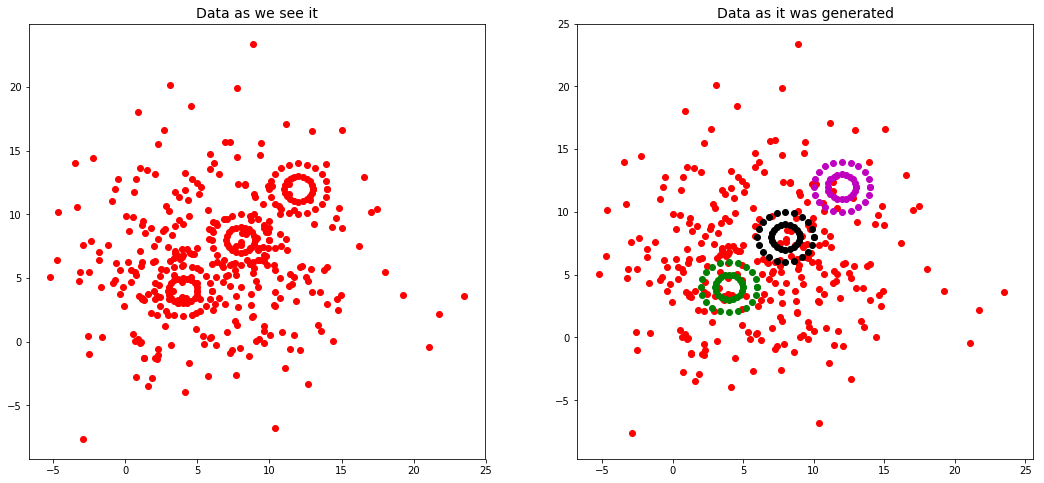

In [168]:
import math
from math import pi 
MAXN1=21
MAXN=150

def points_on_circumference(center=(0, 0), r=1, n=50):
    return [(center[0]+(math.cos(2 * pi / n * x) * r),center[1] + (math.sin(2 * pi / n * x) * r)) for x in range(0, n + 1)]


X = np.random.normal(6,5,size=(MAXN,2))
X = np.concatenate([X, np.random.normal(6,5,size=(MAXN,2))]) 
X = np.concatenate([X, points_on_circumference(center=(4,4), r=1, n=20)])
X = np.concatenate([X, points_on_circumference(center=(4,4), r=2, n=20)])
X = np.concatenate([X, points_on_circumference(center=(8,8), r=1, n=20)])
X = np.concatenate([X, points_on_circumference(center=(8,8), r=2, n=20)])
X = np.concatenate([X, points_on_circumference(center=(12,12), r=1, n=20)])
X = np.concatenate([X, points_on_circumference(center=(12,12), r=2, n=20)])





#Just for visualization purposes
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN1,1))])
y = np.concatenate([y,4*np.ones((MAXN1,1))])
y = np.concatenate([y,5*np.ones((MAXN1,1))])
y = np.concatenate([y,6*np.ones((MAXN1,1))])
y = np.concatenate([y,7*np.ones((MAXN1,1))])
y = np.concatenate([y,8*np.ones((MAXN1,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color = 'g')
plt.scatter(X[(y==4).ravel(),0],X[(y==4).ravel(),1],color = 'g')
plt.scatter(X[(y==5).ravel(),0],X[(y==5).ravel(),1],color = 'k')
plt.scatter(X[(y==6).ravel(),0],X[(y==6).ravel(),1],color = 'k')
plt.scatter(X[(y==7).ravel(),0],X[(y==7).ravel(),1],color = 'm')
plt.scatter(X[(y==8).ravel(),0],X[(y==8).ravel(),1],color = 'm')


plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((18,8))

[[-1.76358087 -0.83569041]
 [ 0.06559319 -1.4054409 ]
 [ 2.19779947  1.77878091]
 [-0.84944018 -0.18507724]]


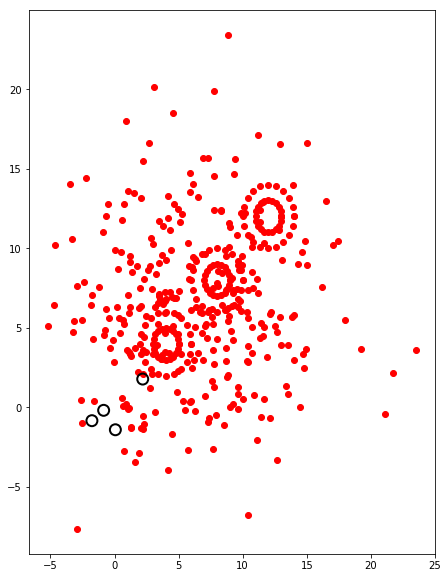

In [169]:
K=4
np.mean(np.random.lognormal(10,1,size=(MAXN1,2)))
idx=np.random.randint(0,X.shape[0],K)
C=5*np.random.rand(K,X.shape[1])-2
Sigma=100.*np.ones((K,X.shape[1]))
Pi=(1./K)*np.ones((K,1))
print (C)
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10,color='k')
fig = plt.gcf()
fig.set_size_inches((16,10))


[[  1.26255746   2.82230975]
 [  6.93224563   3.71608718]
 [  3.53124984   3.68863075]
 [  3.64300549  18.34995389]] [[ 0.27414126]
 [ 0.16241069]
 [ 0.38782671]
 [ 0.17562134]]


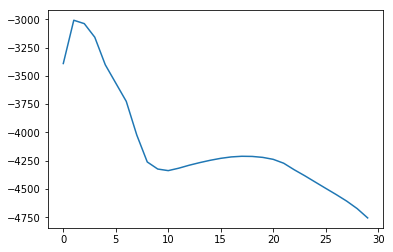

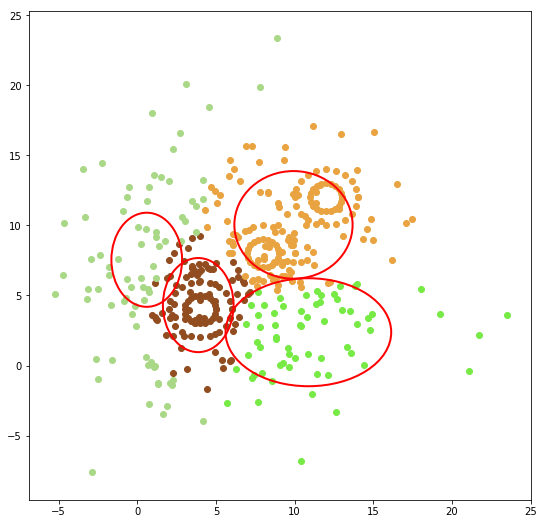

In [170]:
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist

def define_responsibilities(X,C,Sigma,Pi):
    r = np.zeros((X.shape[0],C.shape[0]))
    for i in range(C.shape[0]):
        d = cdist(C[i,:][np.newaxis,:],X,metric='seuclidean',V=Sigma[i,:])**2
        r[:,i]=Pi[i]*np.exp(-0.5*d)/np.prod(np.sqrt(2*np.pi)*Sigma[i,:])
    r = r/np.tile(np.sum(r,axis=1)[:,np.newaxis],(1,C.shape[0]))
    return r

def soft_kmeans2_iter(X,C,Sigma,Pi):
    I=X.shape[1]
    r = define_responsibilities(X,C,Sigma,Pi)
    for k in range(C.shape[0]):
        C[k,:]=np.sum((np.tile(r[:,k][:,np.newaxis],(1,C.shape[1]))*X),axis=0)/np.sum(r[:,k])
        Sigma[k,:]= np.sum(np.tile(r[:,k][:,np.newaxis],(1,C.shape[1]))*(X-np.tile(C[k,:][np.newaxis,:],(X.shape[0],1)))**2,axis=0)/(I*np.sum(r[:,k]))
        Pi[k]=np.sum(r[:,k])/np.sum(r) 
    return C,Sigma,Pi

def evaluate_objective(X,C,Sigma,Pi):
    J=0
    for k in range(C.shape[1]):
        J += Pi[k]*multivariate_normal.pdf(X, mean=C[k,:], cov=Sigma[k,:])
    return np.sum(np.log(J))
    
conv=[]
for iter in range(30):
    conv.append(evaluate_objective(X,C,Sigma,Pi))
    C,Sigma,Pi = soft_kmeans2_iter(X,C,Sigma,Pi)
print (Sigma,Pi)

plt.figure()
plt.plot(conv)
plt.figure()
r = define_responsibilities(X,C,Sigma,Pi)
y_pred = np.argmax(r,axis=1)
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)

from matplotlib.patches import Ellipse
ax = plt.gca()
ellipse = Ellipse(xy=C[0,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[1,:], width=4*np.sqrt(Sigma[1,0]), height=4*np.sqrt(Sigma[1,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[2,:], width=4*np.sqrt(Sigma[2 ,0]), height=4*np.sqrt(Sigma[2,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[3,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)



fig = plt.gcf()
fig.set_size_inches((9,9))

Again the mixure of gaussians here is not classifying well. In order to classify better we should again remove the scattered data since then the classification is easy to be done. One other way could be to add more data in order to fill the gaps that the data creates on the cicles this makes the classification much better (the classifier in this case will find the 3 circle
data sets with a high accurecy).